#### This notebook looks into the estimated variances for the connectivity weights

In [4]:
import init_paths
import os
import numpy as np
import cortico_cereb_connectivity.globals as gl
import glob
import matplotlib.pyplot as plt
from cortico_cereb_connectivity.scripts.script_train_eval_models import *
import matplotlib.pyplot as plt
from scipy import stats

Reading sub-02 sigma2_eps...
Reading sub-03 sigma2_eps...
Reading sub-04 sigma2_eps...
Reading sub-06 sigma2_eps...
Reading sub-08 sigma2_eps...
Reading sub-09 sigma2_eps...
Reading sub-10 sigma2_eps...
Reading sub-12 sigma2_eps...
Reading sub-14 sigma2_eps...
Reading sub-15 sigma2_eps...
Reading sub-17 sigma2_eps...
Reading sub-18 sigma2_eps...
Reading sub-19 sigma2_eps...
Reading sub-20 sigma2_eps...
Reading sub-21 sigma2_eps...
Reading sub-22 sigma2_eps...
Reading sub-24 sigma2_eps...
Reading sub-25 sigma2_eps...
Reading sub-26 sigma2_eps...
Reading sub-27 sigma2_eps...
Reading sub-28 sigma2_eps...
Reading sub-29 sigma2_eps...
Reading sub-30 sigma2_eps...
Reading sub-31 sigma2_eps...


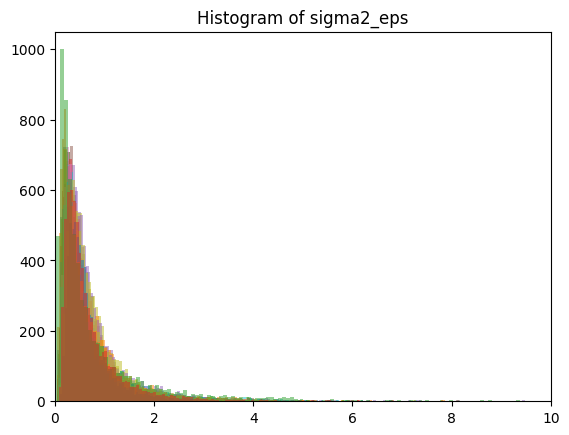

In [6]:
var_folder = os.path.join(os.getcwd(), '../data/variance')

dataset = fdata.get_dataset_class(gl.base_dir,
                                    dataset="MDTB")
subject_list = dataset.get_participants().participant_id

# read subject weight variance matrix from file
var_type = 'sigma2_eps'
# var_type = 'weight_variance'

var_list = []
params_list = []
for s, sub in enumerate(subject_list):
    print(f'Reading {str(sub)} {var_type}...')
    file_path = os.path.join(var_folder, f'{var_type}_{str(sub)}.npy')
    var = np.load(file_path)
    var_list.append(np.load(file_path))
    
    plt.hist(var, bins='auto', alpha=0.5)
    shape, loc, scale = stats.gamma.fit(var[~np.isnan(var)], floc=0)
    params_list.append((shape, loc, scale))
    # print(f'max: {np.nanmax(var)}')

# show
plt.title(f'Histogram of {var_type}')
plt.xlim((0,10))
plt.show()

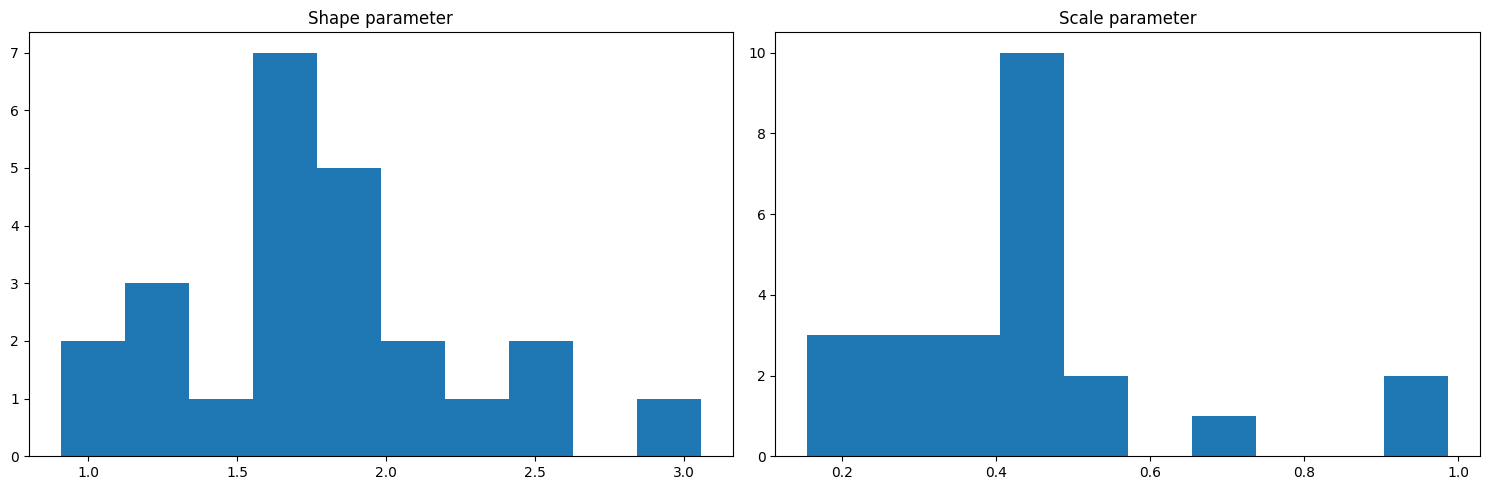

(1.147303298236169, 1.2951274520344769, 0.9679436505658018, 1.8452195681630037, 1.7822897660345203, 1.6070884950225959, 3.0570816937067327, 1.6375526562271243, 2.1968276259865145, 1.6968870328825905, 1.5361470793690861, 1.8737230591204794, 2.542917563894335, 1.7508963622765255, 1.8814280106435888, 1.6895578585821485, 1.6420253488568122, 2.262145061135117, 2.0946819405313852, 1.615498520643554, 2.5935057319314105, 1.3085170629883034, 0.9076669866982234, 1.7745448565227135)
(0.6637798380267982, 0.46657192379123447, 0.9632069640215286, 0.22398335299700103, 0.498003478011745, 0.48046865555341634, 0.15497464833030872, 0.4236359668707756, 0.38499293370453785, 0.4722049769668939, 0.35736278023811796, 0.42706672536184603, 0.18579466478136689, 0.4060979729144744, 0.4740329939830097, 0.30344052070407035, 0.433431972919698, 0.2799293666758564, 0.38761037408371685, 0.41915654448113043, 0.27181207571727045, 0.5612981305479915, 0.986969927097492, 0.4282710771621106)


In [7]:
shapes, _, scales = zip(*params_list)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(shapes)
axs[0].set_title('Shape parameter')
axs[1].hist(scales)
axs[1].set_title('Scale parameter')

plt.tight_layout()
plt.show()

print(shapes)
print(scales)

/tmp/ipykernel_337114/2898695569.py:1: RuntimeWarning: All-NaN axis encountered
  plt.hist(np.nanmax(var_list, axis=0) / np.nanmin(var_list, axis=0), bins='auto')


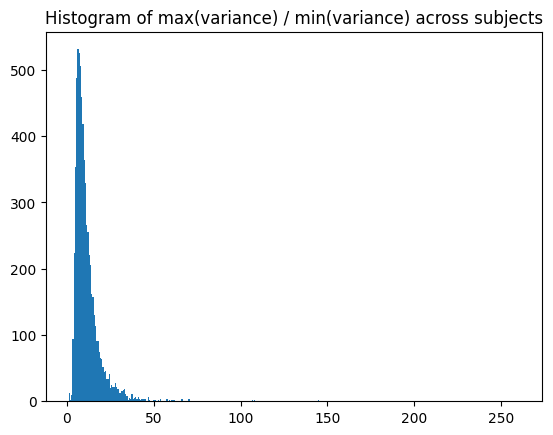

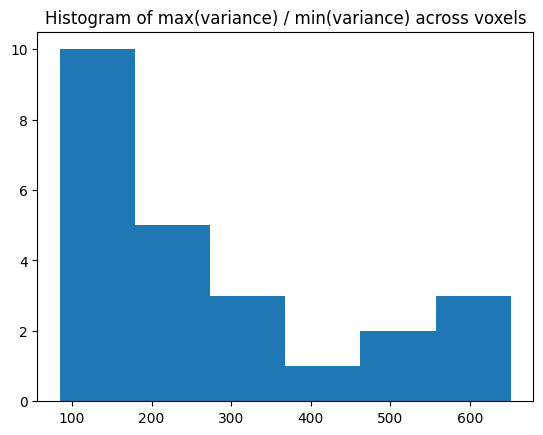

mean variance: [0.7615568  0.60427011 0.93233007 0.41329847 0.8875865  0.77215565
 0.47377016 0.6937262  0.84576311 0.8012785  0.54896179 0.80020477
 0.47246052 0.71103546 0.89185895 0.51268032 0.71170629 0.63324083
 0.81192045 0.67714678 0.70494618 0.73446818 0.89584002 0.75998624]
C_i: [0.0370562  0.04670164 0.03026868 0.06828093 0.03179454 0.03654756
 0.0595656  0.04067945 0.03336679 0.03521922 0.05140686 0.03526648
 0.05973071 0.03968916 0.03164223 0.05504483 0.03965175 0.04456504
 0.03475759 0.04167546 0.040032   0.03842291 0.03150161 0.03713278]


In [5]:
plt.hist(np.nanmax(var_list, axis=0) / np.nanmin(var_list, axis=0), bins='auto')
plt.title('Histogram of max(variance) / min(variance) across subjects')
plt.show()

plt.hist(np.nanmax(var_list, axis=1) / np.nanmin(var_list, axis=1), bins='auto')
plt.title('Histogram of max(variance) / min(variance) across voxels')
plt.show()

mean_variance = np.nanmean(var_list, axis=1)
print(f'mean variance: {mean_variance}')
c_i = np.reciprocal(mean_variance) / np.sum(np.reciprocal(mean_variance))
print(f'C_i: {c_i}')

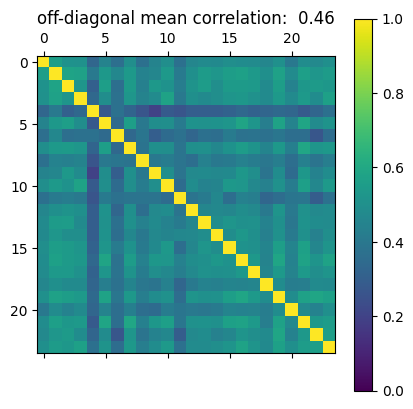

In [7]:
def rank_with_nan(arr):
    valid_indices = ~np.isnan(arr)
    ranks = np.empty_like(arr)
    ranks[valid_indices] = np.argsort(np.argsort(arr[valid_indices]))
    ranks[~valid_indices] = np.nan
    return ranks

all_sub_ranks = np.array([rank_with_nan(var_list[s]) for s in range(len(subject_list))])

correlation_matrix, _ = stats.spearmanr(all_sub_ranks, axis=1, nan_policy='omit')

mat = plt.matshow(correlation_matrix)
plt.colorbar()
mat.set_clim(0, 1)
plt.title(f'off-diagonal mean correlation: {np.mean(correlation_matrix[~np.eye(24, dtype=bool)]): .2f}')
plt.show()